# SVM Ball Tracking Test

## Imports

In [319]:
"""
Author: Ankush Gola
"""

import numpy as np
import scipy as sp
from sklearn import preprocessing
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import cv2

# Configure matplotlib to show figures embedded in the notebook
%matplotlib inline

test_imgs = ['cloudy_test_1', 'cloudy_test_2', 'cloudy_test_3', 'cloudy_test_4', 'cloudy_test_5', 
            'frame_1', 'indoor_test_1', 'indoor_test_2', 'indoor_test_3', 'sunny_test_1', 'sunny_test_2',
            'sunny_test_3', 'sunny_test_4']

## Training

In [4]:
def flatten(img):
    """
    Flatten a color image into a vector of pixels
    """
    M, N, P = img.shape
    return img.reshape(M*N, P)

    #['train_1_sunny', 'train_2_sunny', 'train_3_sunny', 'train_4_sunny', 'train_1_cloudy', 'train_2_cloudy', 
    #'train_3_cloudy', 'train_5_cloudy', 'train_6_cloudy', 'train_7_cloudy', 'train_8_cloudy',

15.3437449932
14.5679831505
15.0070998669
16.6077311039
16.345375061
16.7263729572
15.465004921
14.5297679901
14.4087629318
14.6515719891
14.6946349144
14.5531041622
14.7720689774


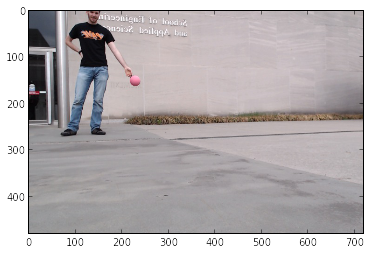

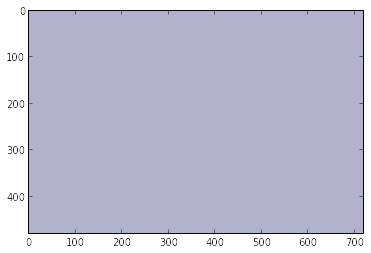

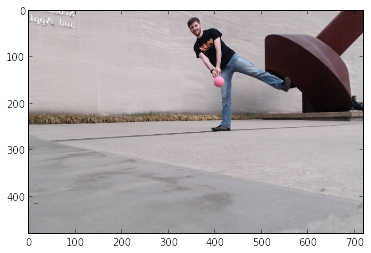

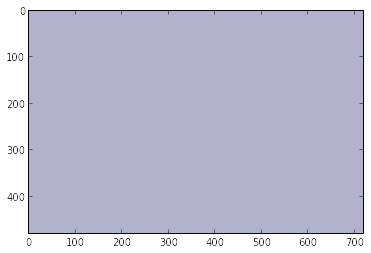

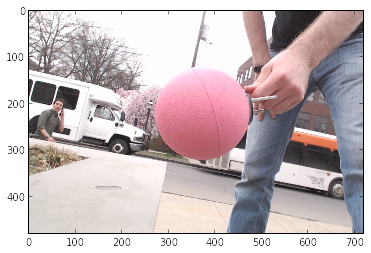

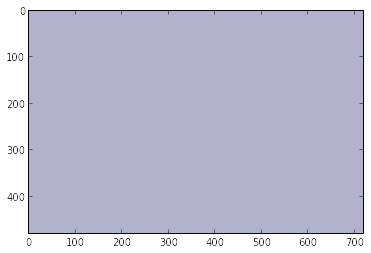

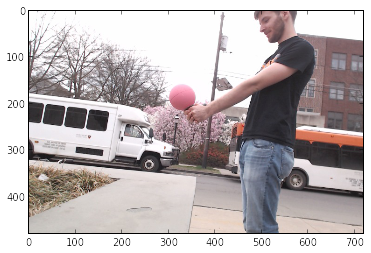

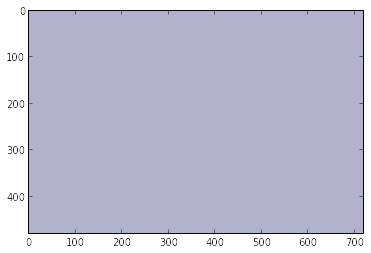

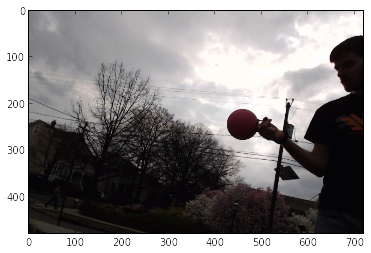

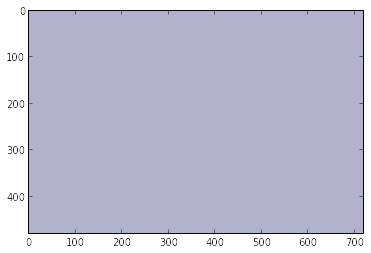

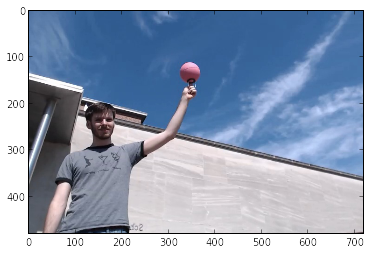

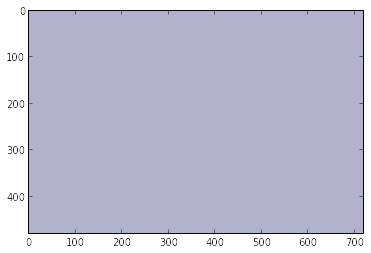

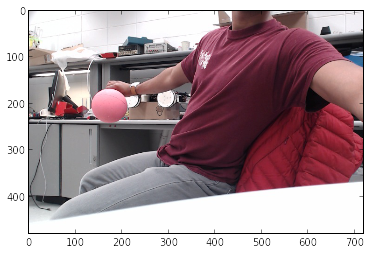

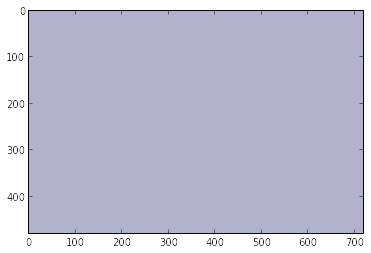

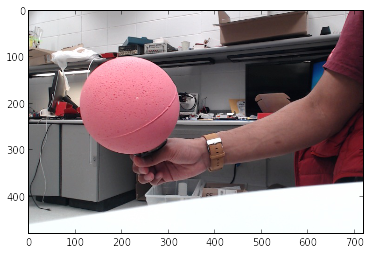

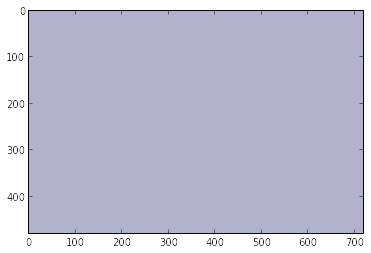

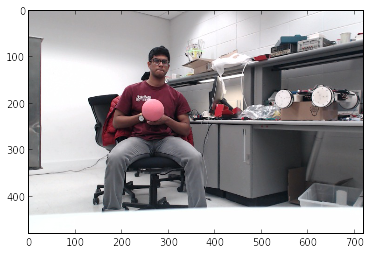

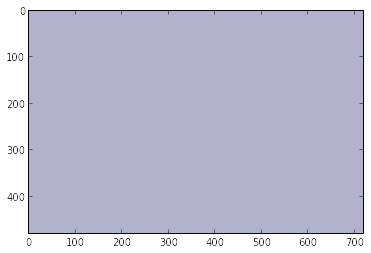

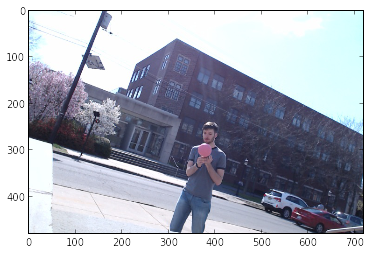

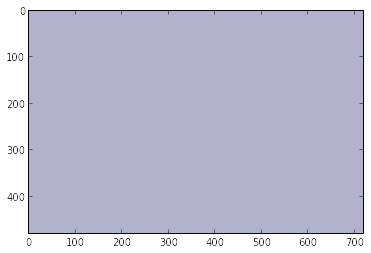

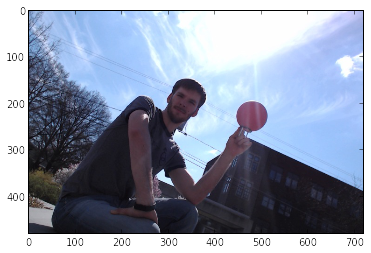

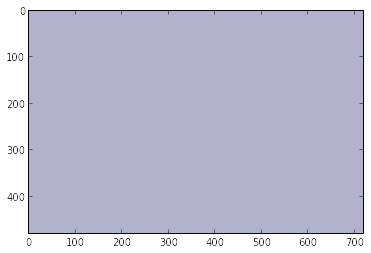

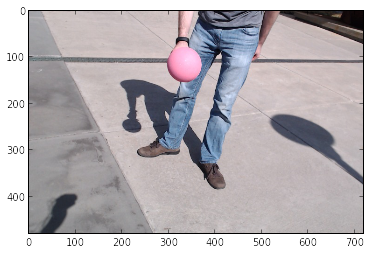

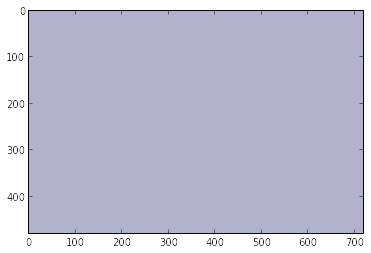

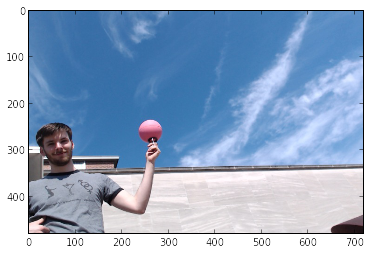

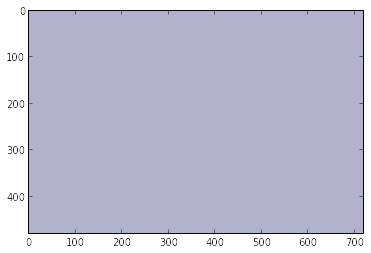

In [324]:
ball_imgs = ['ball_2', 'ball_3', 'ball_4', 'ball_5', 'ball_6', 'ball_8', 'ball_9']

d = {}

# Flatten images into a single vector
for img in ball_imgs:
    train = (mpimg.imread('train/' + img +'.jpg').astype(float))/255
    train = flatten(train)
    d[img] = train
    
X = np.vstack(tuple([d[k] for k in d]))

# Preprocess data
#X = preprocessing.scale(X)

# Train Single Class SVM
nu = 10
gamma = 2
clf1 = svm.OneClassSVM(nu=1, kernel="rbf", gamma=1).fit(X)

for img in test_imgs:
    test_1 = cv2.imread('test/' + img + '.jpg')
    test_1 = cv2.cvtColor(test_1, cv2.COLOR_BGR2RGB)
    test_1 = test_1.astype(float)/255
    
    plt.figure()
    plt.imshow(test_1)
    
    M, N, P = test_1.shape
    #test_1_f = preprocessing.scale(flatten(test_1), axis=1)
    test_1_f = flatten(test_1)
    
    # classify pixels in test_1
    t = time.time()
    Z = clf1.predict(test_1_f)
    Z = Z.reshape(M, N)
    print time.time()-t
    
    # mask the image
    grey = [0.7, 0.7, 0.8]
    out = np.copy(test_1)
    out[np.where(Z==-1)] = grey
    
    plt.figure()
    plt.imshow(out)

## Trying with a 2 class Classifier

In [330]:
ball_imgs = ['ball_2', 'ball_3', 'ball_4', 'ball_5', 'ball_6', 'ball_8', 'ball_9']
back_imgs = ['sky_1', 'sky_2', 'granite', 'joseph', 'skin', 'skin_2', 'stone', 'sculpt', 'jacket', 'brick']

ball, back = {}, {}

# Flatten images into a single vector
for img in ball_imgs:
    ball_img = (mpimg.imread('train/'+img+'.jpg').astype(float))/255
    train = flatten(ball_img)
    ball[img] = train

for img in back_imgs:
    back_img = (mpimg.imread('train/'+img+'.jpg').astype(float))/255
    train = flatten(back_img)
    back[img] = train

X_ball, X_back = np.vstack(tuple([ball[k] for k in ball])), np.vstack(tuple([back[k] for k in back]))
y_ball, y_back = np.ones(X_ball.shape[0]).astype(np.uint8), np.zeros(X_back.shape[0]).astype(np.uint8)

X = np.vstack((X_ball, X_back))
y = np.hstack((y_ball, y_back))

# Train the SVM
C = 10
gamma = 2
clf2 = svm.SVC(C=C, kernel='rbf', gamma=gamma, cache_size=1500).fit(X, y)
joblib.dump(clf2, 'model/clf.pkl')

['model/clf.pkl',
 'model/clf.pkl_01.npy',
 'model/clf.pkl_02.npy',
 'model/clf.pkl_03.npy',
 'model/clf.pkl_04.npy',
 'model/clf.pkl_05.npy',
 'model/clf.pkl_06.npy',
 'model/clf.pkl_07.npy',
 'model/clf.pkl_08.npy',
 'model/clf.pkl_09.npy',
 'model/clf.pkl_10.npy',
 'model/clf.pkl_11.npy']

## Trying with a 3 class Classifier

In [37]:
ball_imgs = ['ball_1', 'ball_2', 'ball_3', 'ball_4', 'ball_5']
sky_imgs = ['sky_1', 'sky_2', 'sky_3'] 
other_imgs = ['joseph', 'stone', 'granite', 'skin']

ball, sky, other = {}, {}, {}

# Flatten images into a single vector
for img in ball_imgs:
    ball_img = (mpimg.imread('train/'+img+'.jpg').astype(float))/255
    train = flatten(ball_img)
    ball[img] = train

for img in sky_imgs:
    sky_img = (mpimg.imread('train/'+img+'.jpg').astype(float))/255
    train = flatten(sky_img)
    sky[img] = train

for img in other_imgs:
    other_img = (mpimg.imread('train/'+img+'.jpg').astype(float))/255
    train = flatten(other_img)
    other[img] = train


X_ball, X_sky, X_other = np.vstack(tuple([ball[k] for k in ball])), np.vstack(tuple([sky[k] for k in sky])), np.vstack(tuple([other[k] for k in other]))

o = np.empty(X_other.shape[0])
o.fill(2)

print o.shape
y_ball, y_sky, y_other = np.zeros(X_ball.shape[0]), np.ones(X_sky.shape[0]), o

X = np.vstack((X_ball, X_sky, X_other))
y = np.hstack((y_ball, y_sky, y_other))
#X = preprocessing.scale(X)

print X.shape

# Train the SVM
C = 2
gamma = 1
clf3 = svm.SVC(C=C, kernel='linear', gamma=gamma).fit(X, y)

(3209,)
(7199, 3)


## Classify

1.05549120903
(226.5, 148.5, 12.349089)
1.10986709595
(355.5, 37.5, 2.5495098)
1.03008794785
(371.5, 226.5, 103.29811)
1.00109410286
(326.5, 187.5, 26.767517)
1.03984808922
1.28347587585
(343.5, 132.5, 20.988092)
0.959567070007
(406.5, 46.5, 7.6485291)
0.933221817017
(211.5, 203.5, 104.16573)
0.974488973618
(265.5, 213.5, 23.505318)
0.973780870438
(373.5, 300.5, 12.747549)
1.01653504372
(477.5, 228.5, 32.596012)
0.977292060852
(332.5, 114.5, 36.749149)
0.930626153946
(259.5, 259.5, 25.109758)


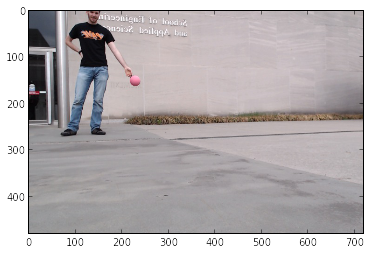

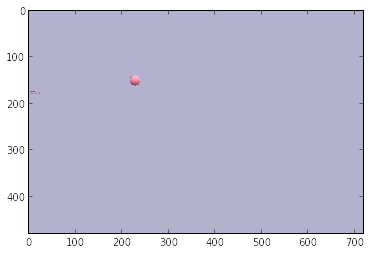

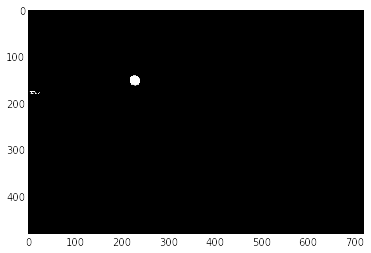

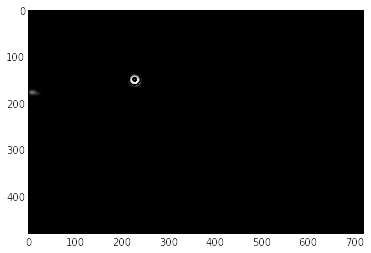

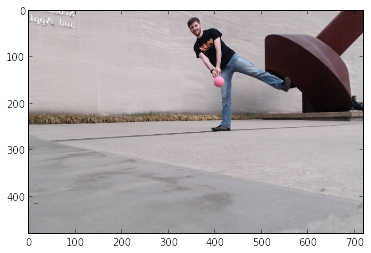

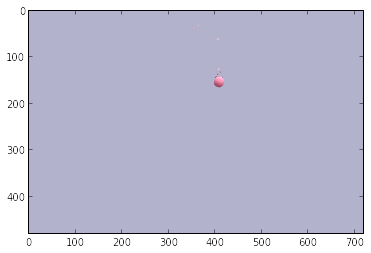

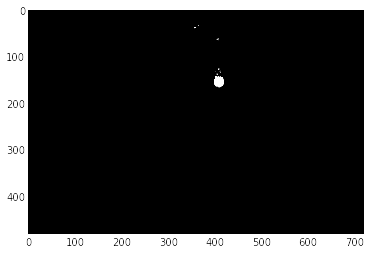

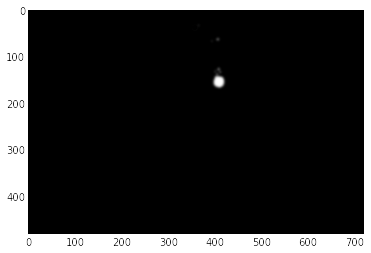

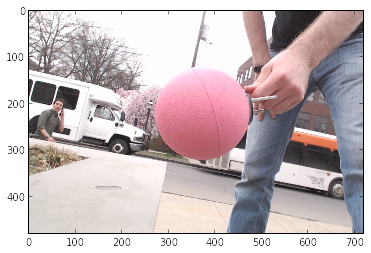

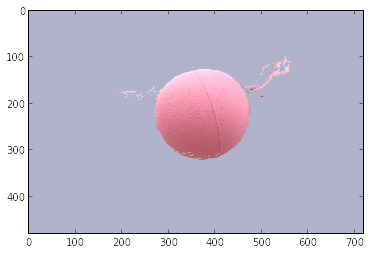

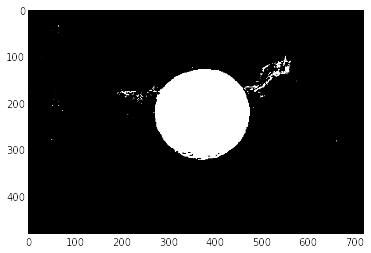

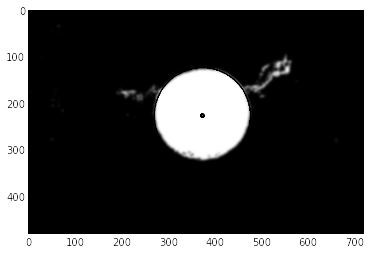

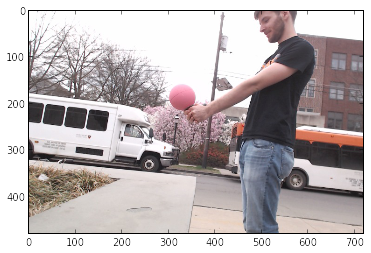

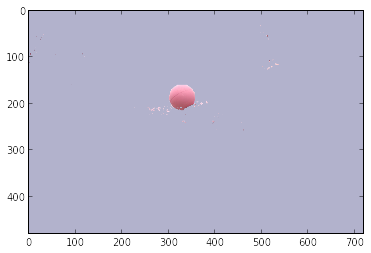

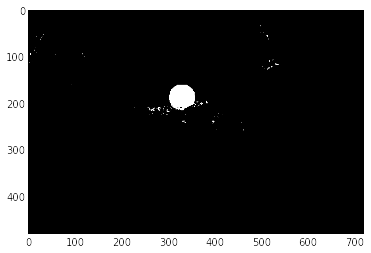

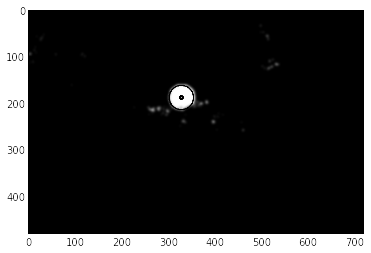

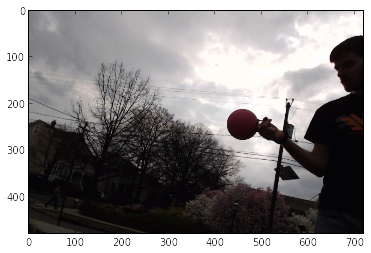

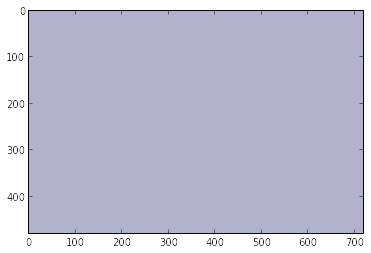

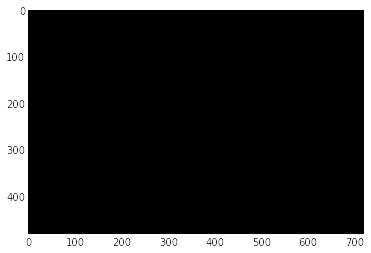

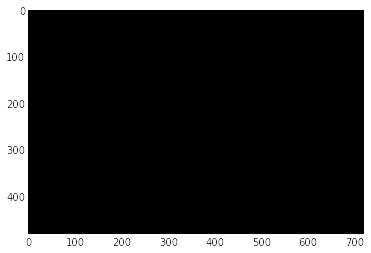

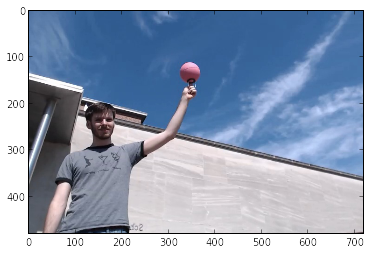

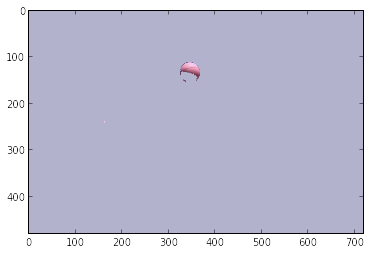

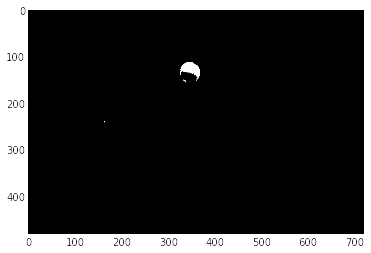

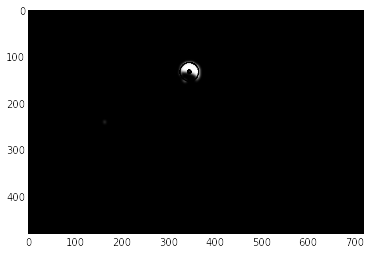

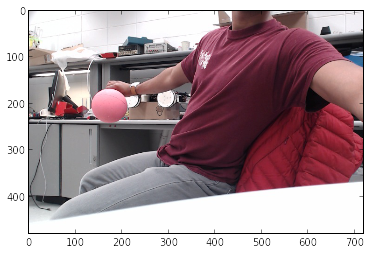

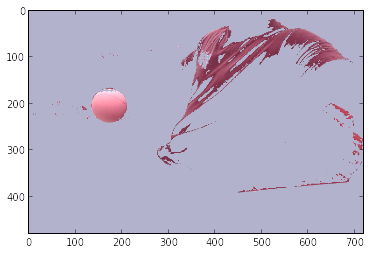

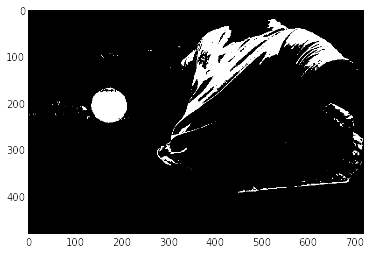

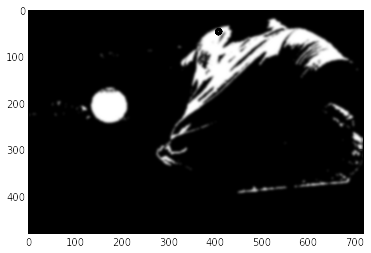

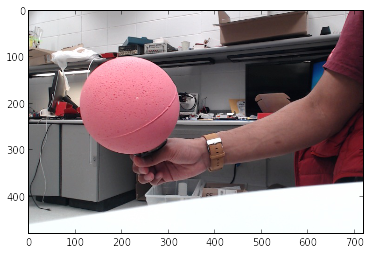

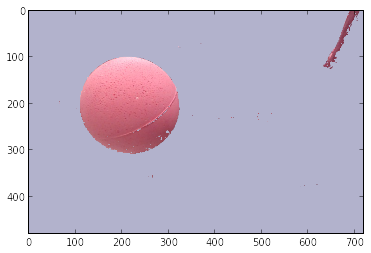

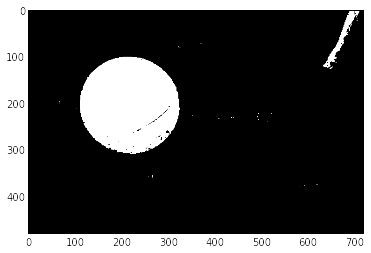

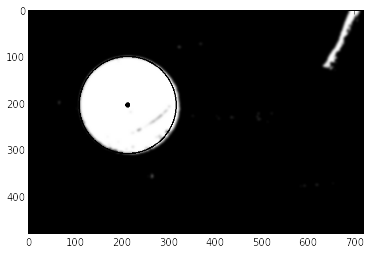

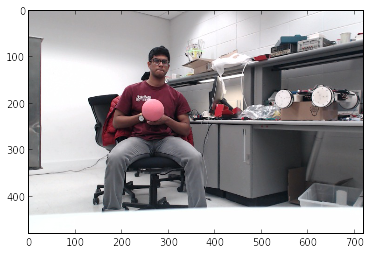

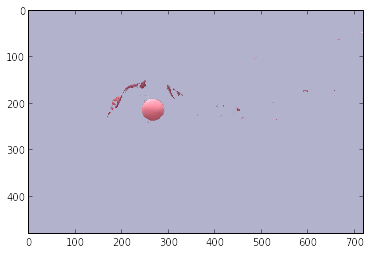

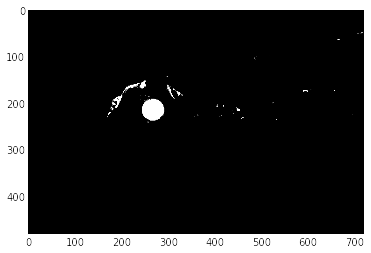

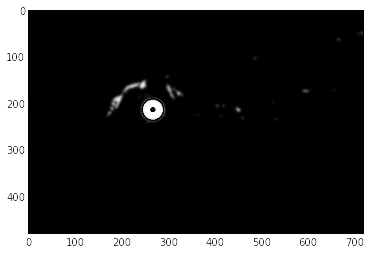

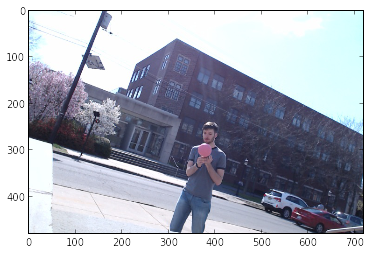

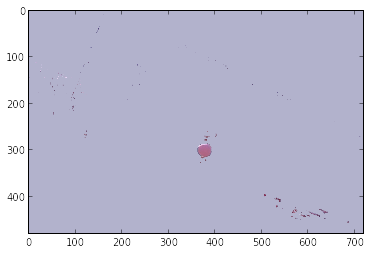

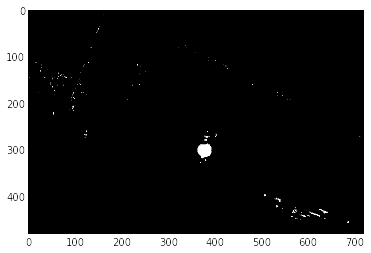

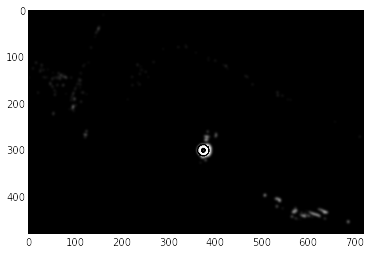

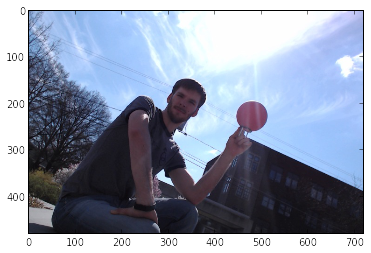

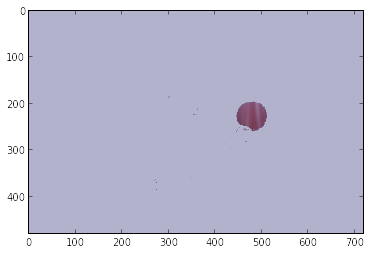

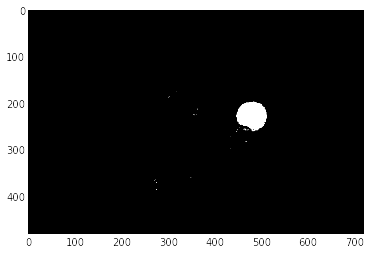

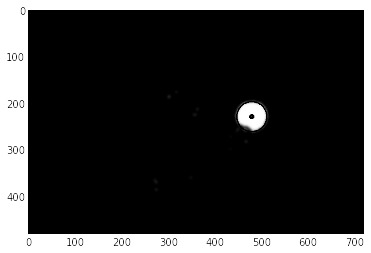

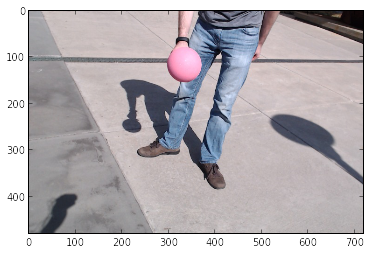

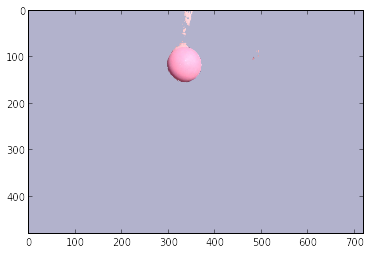

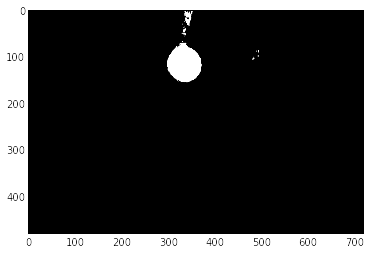

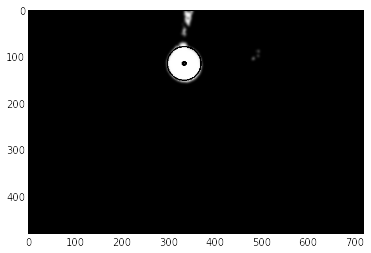

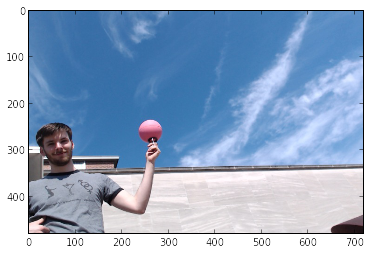

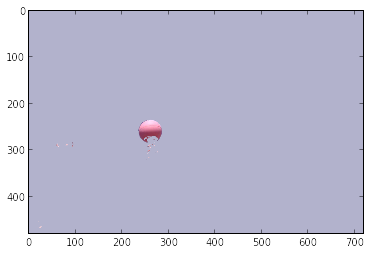

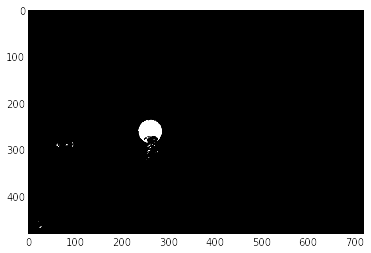

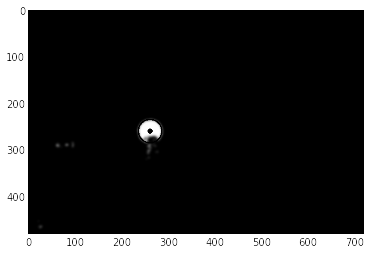

In [331]:
from sklearn.externals import joblib

clf2 = joblib.load('model/clf.pkl') 

#test_1 = ((mpimg.imread('test/sunny_test_4.jpg')).astype(float))/255
#test_1 = cv2.resize(test_1,None,fx=1, fy=1)

for img in test_imgs:
    test_1 = cv2.imread('test/' + img + '.jpg')
    test_1 = cv2.cvtColor(test_1, cv2.COLOR_BGR2RGB)
    test_1 = test_1.astype(float)/255
    
    plt.figure()
    plt.imshow(test_1)
    
    M, N, P = test_1.shape
    #test_1_f = preprocessing.scale(flatten(test_1), axis=1)
    test_1_f = flatten(test_1)
    
    # classify pixels in test_1
    t = time.time()
    Z = clf2.predict(test_1_f)
    Z = Z.reshape(M, N)
    print time.time()-t
    
    # mask the image
    grey = [0.7, 0.7, 0.8]
    out = np.copy(test_1)
    out[np.where(Z==0)] = grey
    
    plt.figure()
    plt.imshow(out)
    
    plt.figure()
    plt.imshow(Z)
    Z = cv2.GaussianBlur(Z.astype(np.float),(15,15),0)
    Z = (Z*255).astype(np.uint8)
    plt.figure()
    plt.imshow(Z)
    
    circles = cv2.HoughCircles(Z,cv2.cv.CV_HOUGH_GRADIENT,1,1600, param1 = 50, param2 = 10, minRadius=2)
    if circles != None:
        (x, y, r) = circles[0,:][0]
        print (x, y, r)
        cv2.circle(Z, (x, y), r, (0,255,0), 2)
        cv2.circle(Z,(x, y), 3 ,(0,0,255),3)